In [1]:
#this defaults plots to matplotlib 1.0 formatting
import matplotlib.style
import matplotlib as mpl
#mpl.style.use('classic')
%matplotlib inline
mpl.rcParams['figure.dpi']= 150

# importing packages needed to run this script 
from subprocess import call
import pickle as pickle
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.cluster.hierarchy as sch

import os
import time
import matplotlib.pyplot as plt
import numpy as np
import copy
import colorsys
import matplotlib.image as mpimg
from IPython.display import display
from IPython.display import Image
import scipy.cluster.hierarchy as sch
from scipy.stats import scoreatpercentile 
from pysca import scaTools as sca
# import mpld3
import pickle as pickle
from optparse import OptionParser
import sys
sys.path.append('../utilities/')

from graph_helpers import (
   gen_amino_acid_position_in_ref_sequence_graph,
   gen_clustered_similarity_matrix, 
   gen_unclustered_similarity_matrix,
)
from helpers import (
    show_processmsa_results,
    seq_count_check
)

%matplotlib inline

if not os.path.exists('../output/'):
    os.makedirs('../output/')  

In [2]:
path2aln_processed = '/home/bjohnson/rdb/data/UbiApfamalignfull.txt'
path2out = '../output/'
command =  str('scaProcessMSA -a %s -d %s -i 0' % (path2aln_processed, path2out))
print(command)
call(command,shell = 'True')

scaProcessMSA -a /home/bjohnson/rdb/data/UbiApfamalignfull.txt -d ../output/ -i 0
Loaded alignment of 28982 sequences, 1446 positions.
Checking alignment for non-standard amino acids
Aligment size after removing sequences with non-standard amino acids: 28929
Trimming alignment for highly gapped positions (80% or more).
28929
Alignment size post-trimming: 284 positions
Looking for PDBs in home/bjohnson/pySCA-master/data/
using provided reference index 0
A0A7D8UUW3_9HELO/60-173
here!
len refseq 102, len refpos 284, len algseq 284, len pairalg 284, len gloalg 284
Conducting sequence and position filtering: alignment size is 28929 seqs, 284 pos
ATS should also have 284 positions - ATS: 284
Keeping 25433 sequences of 28929 sequences (after filtering for gaps)
Keeping 514 sequences of 25433 sequences (after filtering for seq similarity)
After filtering: alignment size is 514 seqs, 480 effective seqs, 218 pos
Final alignment parameters:
Number of sequences: M = 514
Number of effective sequenc

0

In [4]:
dbname = "UbiApfamalignfull.db"
pickle_path = '/home/bjohnson/rdb/output/UbiApfamalignfull.db'
db = pickle.load(open(pickle_path,'rb'))
Dseq = db['sequence']

In [5]:
show_processmsa_results(Dseq)

*****Final processed alignment parameters****
Number of sequences: M = 514
Number of effective sequences: M' = 482
Number of alignment positions: L = 218
Number of positions in the ats: 218
Number of structure positions mapped: 89
Missing key distmat
****************************************


In [6]:
# check for sufficient sequences in alignment
seq_count_check(Dseq)

The number of effective sequences in this MSA is: 482
This alignment has a sufficient number of effective sequences for analysis with SCA.
Npos (L) = 218


In [7]:
# Apply scaCore to our processed alignment 
command = 'scaCore -i %s' % (pickle_path)
print (command)
call(command, shell = 'True')
db = pickle.load(open(pickle_path,'rb'))
Dsca = db['sca']
print("Executed")

scaCore -i /home/bjohnson/rdb/output/UbiApfamalignfull.db
Computing the sequence projections.
Computing sequence similarity matrix.
Computing the SCA conservation and correlation values.
Computing matrix randomizations...
Randomizations complete, 10 trials, time: 0.6 minutes
Calculations complete, writing to database file /home/bjohnson/rdb/output/UbiApfamalignfull
Executed


In [8]:
# run scaSectorID 
command = 'scaSectorID -i %s' % (pickle_path)
print (command)
call(command, shell = 'True')

# Load and store results of scaSectorID
db = pickle.load(open(pickle_path,'rb'))
Dsect = db['sector'] 
print("Executed")

scaSectorID -i /home/bjohnson/rdb/output/UbiApfamalignfull.db
Selected kpos=7 significant eigenmodes.
Calculations complete, writing to database file /home/bjohnson/rdb/output/UbiApfamalignfull
Executed


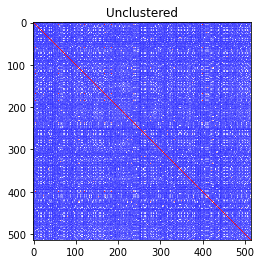

In [9]:
#check similarity matrix
gen_unclustered_similarity_matrix(title="Unclustered",Dsca=[Dsca])

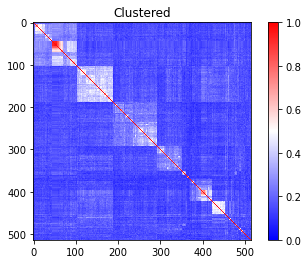

In [10]:
gen_clustered_similarity_matrix(title="Clustered", Dsca=[Dsca])

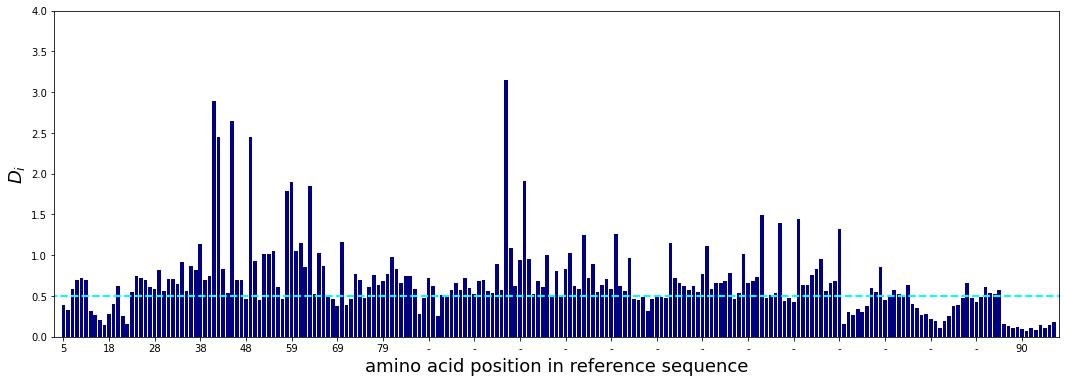

In [11]:
#Visualizing evolutionary conservation
gen_amino_acid_position_in_ref_sequence_graph(
    xlabel='amino acid position in reference sequence', 
    Dsca=[Dsca], 
    Dseq=[Dseq]
)